In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
alojamientos_california = pd.read_csv(url)

#Este es el primer proyecto de aprendizaje no supervisado. Me gusta más que el supervisado
#porque no está tan limitado a los parámetros que se le ocurran a una persona, sino
#que simplemente busca estructuras y regularidades en los datos sin que lo hayamos
#predispuesto a encontrar determinados tipos de estructura o a no hacer uso de otros

#La contraparte es que no podemos saber exactamente qué tiene en cuenta para tomar
#sus decisiones. Sabemos que sabe porque podemos medir su desempeño, y sabemos cómo
#lo ha aprendido porque entendemos los procesos que sigue, pero no podemos saber qué
#grado de importancia le da a cada dato o a cada conjunto de datos.

#Es más efectivo pero menos explicativo

#Bueno, vamos allá. Lo primero que hago es ver las columnas

print(alojamientos_california.columns)

#Y me quedo con las 3 que indicaba el enunciado. Latitud, longitud y MedInc
alojamientos_california = alojamientos_california[['Latitude', 'Longitude', 'MedInc']]

# Separo en entrenamiento y prueba. Siempre un 20% para prueba
train_data, test_data = train_test_split(alojamientos_california, test_size=0.2, random_state=19)

print(train_data.head())

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
       Latitude  Longitude  MedInc
18690     36.95    -121.75  4.7071
4375      34.10    -118.28  2.3421
6805      34.10    -118.10  2.6553
3907      34.19    -118.50  4.0000
8737      33.82    -118.31  4.1406


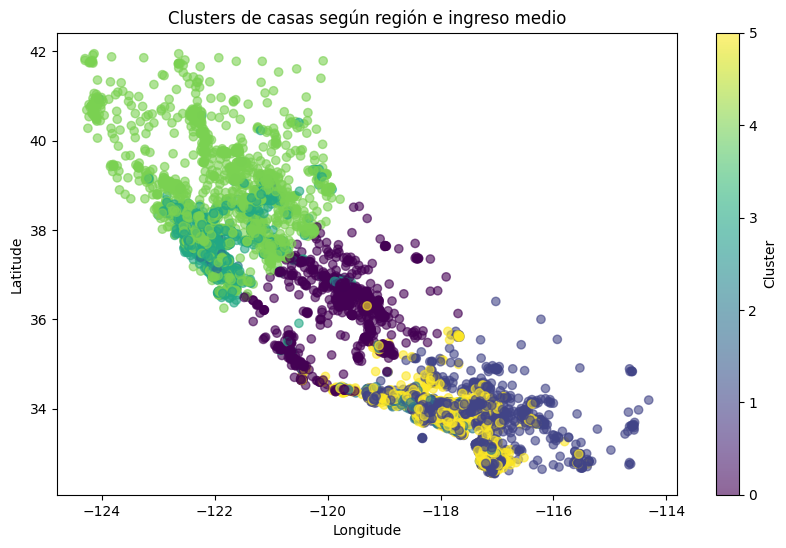

In [58]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)

#Construyo el k-means
kmeans = KMeans(n_clusters=6, random_state=42)
train_data['cluster'] = kmeans.fit_predict(train_scaled)

#Utilizo esta nueva variable para crear el segundo modelo
clusters = train_data['cluster']

#Y lo ploteo
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas según región e ingreso medio')
plt.show()

In [59]:
#Ahora ya nos saca los clusters también en una nueva columna
print(train_data.head())

       Latitude  Longitude  MedInc  cluster
18690     36.95    -121.75  4.7071        3
4375      34.10    -118.28  2.3421        1
6805      34.10    -118.10  2.6553        1
3907      34.19    -118.50  4.0000        5
8737      33.82    -118.31  4.1406        5


In [60]:
y_test = list(kmeans.predict(test_data))
#print(y_test)
test_data['cluster'] = y_test
print(test_data.head())

       Latitude  Longitude  MedInc  cluster
17578     37.30    -121.94  4.7275        4
12660     38.50    -121.44  1.4007        4
10979     33.77    -117.85  4.0398        4
8775      33.80    -118.31  3.7167        4
8803      33.78    -118.40  8.5421        3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [62]:
#Ahora hay que separar las características de las etiquetas y luego entrenar un modelo
#que las prediga
X_train = train_data
y_train = clusters

X_test = test_data
y_test = test_data['cluster']

#En este caso he elegido como modelo un árbol de decisión para determinar a qué grupo /
#categoría pertenece cada dato
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

print(y_test.head())

17578    4
12660    4
10979    4
8775     4
8803     3
Name: cluster, dtype: int32


In [63]:
#Aquí simplemente evalúo la performance del modelo.
#Tras revisar este ejercicio con Darío (mentor), me confirmó que un 100% de aciertos
#por parte del modelo es normal porque estamos trabajando con datos muy limpios y perfectamente
#estructurados para que esto ocurra
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
#Por hacer una recapitulación, estas son las conclusiones que saco en relación a utilizar
#el modelo k-means:

#En ocasiones, predecir el outcome exacto en base a los datos no es fundamental, y
#nos basta con saber a qué categoría va a pertenecer ese dato

#Cuando este es el caso, podemos crear grupos de datos que consideramos que pertenecen
#a la misma categoría según lo cerca que estén (según cuanto tengan que ver entre sí)

#Una vez que los tenemos por grupos, la tarea de clasificación se vuelve mucho más
#fácil para otros modelos, porque ahora solamente tienen que ser capaces de identificar
#en qué grupo va a "caer" cada dato.